In [90]:
import os 
import numpy as np 
import pandas as pd 

from keras import optimizers, losses, activations, models 
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization 
from sklearn.model_selection import train_test_split
import keras
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display

In [16]:
#Getting the path to the audio folders

TestPath ='data/test/audio'
TrainPath = 'data/train/audio'

PermitedLabels = ['yes','no','up','down','left','right','on','off','stop','go','silence','unknown']

TestSubPath = [x.name for x in os.scandir(TestPath)] # Get name of subdirectories or files
TrainSubPath = [x.name for x in os.scandir(TrainPath)] # Get name of subdirectories or files

TrainSubPath.remove('_background_noise_')#remove directory of background noises 


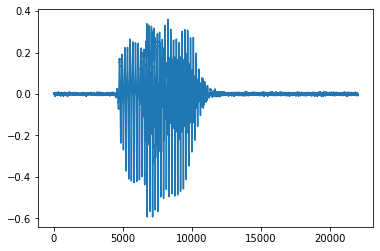

In [18]:
#Example of file load, plot and playback 
audio, sr = librosa.load('data/test/audio/'+TestSubPath[0])


plt.plot(audio) #Plotting the sound
plt.show()

IPython.display.Audio(audio,rate = sr)#Playing the sound

In [46]:
#Get audio files for training and testing (now only a subset is selected)
train = []
for folder in TrainSubPath:
    print(folder)
    label = folder
    if folder in PermitedLabels:
        fullpath = TrainPath + "/" + folder
        filepath = [x.name for x in os.scandir(fullpath)]
        for file in filepath: 
            audio, sr = librosa.load(fullpath + "/" + file)
            train.append([audio,sr,label])


bed
bird
cat
dog
down
eight
five
four
go
happy
house
left
marvin
nine
no
off
on
one
right
seven
sheila
six
stop
three
tree
two
up
wow
yes
zero


In [52]:
#create dataframe
nTrain = np.array(train)
df = pd.DataFrame(nTrain)

In [96]:
#extracting mel-frequency cepstral coefficients and spectral contrasts (features)
mfcc = librosa.feature.mfcc(nTrain[40][0],nTrain[40][1],n_mfcc = 40)
sc = librosa.feature.spectral_contrast(nTrain[56][0],nTrain[56][1])

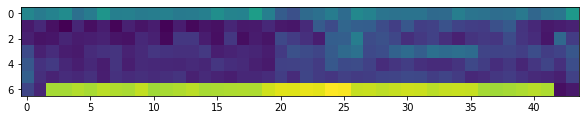

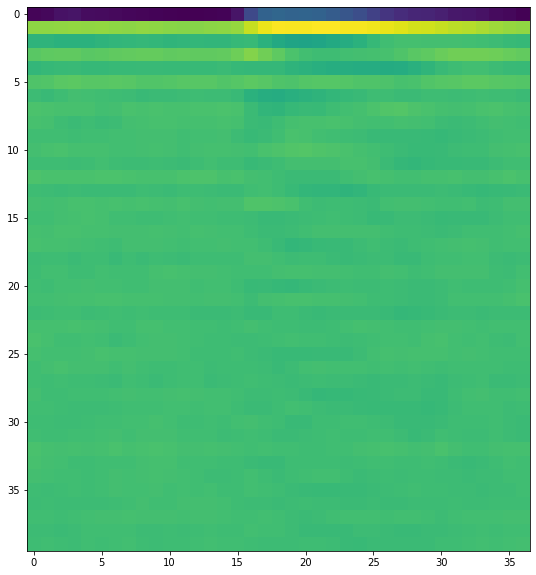

In [97]:
plt.figure(figsize = (10,10))
plt.imshow(sc)
plt.figure(figsize = (10,10))
plt.imshow(mfcc)

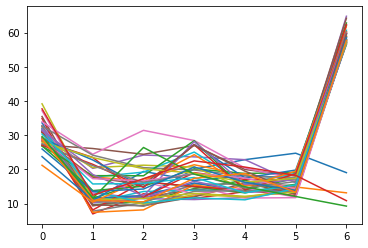

In [98]:
plt.plot(sc)
plt.show()

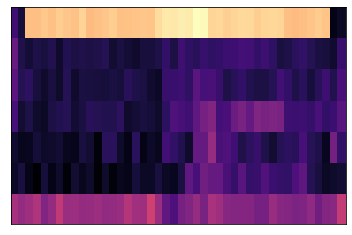

In [99]:
librosa.display.specshow(sc)